In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import optimizers,layers,models, utils
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(train_data, train_label),(test_data, test_label) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 4s 2us/step


In [6]:
print(len(train_data))
print(len(test_data))

8982
2246


In [8]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 2s 3us/step


In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_news = ' '.join(reverse_word_index.get(i-3,'.') for i in train_data[0])

In [13]:
decoded_news

'. . . said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [17]:
def sequence_vectorize(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i,sequence] = 1.
    return result            

In [44]:
x_train = sequence_vectorize(train_data)
x_test = sequence_vectorize(test_data)

In [45]:
print(train_label) #this is multilabel, so we need to apply one-hot encoding

[ 3  4  3 ... 25  3 25]


In [46]:
one_hot_train_label = utils.to_categorical(train_label)
one_hot_test_label = utils.to_categorical(test_label)

In [47]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_label[:1000]
parital_y_train = one_hot_train_label[1000:]

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [49]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,parital_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 454us/sample - loss: 2.8923 - acc: 0.4375 - val_loss: 1.9212 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 233us/sample - loss: 1.5640 - acc: 0.6903 - val_loss: 1.3722 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 2s 222us/sample - loss: 1.1348 - acc: 0.7616 - val_loss: 1.1620 - val_acc: 0.7540
Epoch 4/20
7982/7982 [==============================] - 2s 228us/sample - loss: 0.8895 - acc: 0.8156 - val_loss: 1.0499 - val_acc: 0.7890
Epoch 5/20
7982/7982 [==============================] - 2s 220us/sample - loss: 0.7096 - acc: 0.8553 - val_loss: 0.9715 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 2s 224us/sample - loss: 0.5678 - acc: 0.8816 - val_loss: 0.9375 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 2s 221us/sample - loss: 0.4595 - acc: 0.9074 - val_loss: 0.9031 - va

In [50]:
dict_history = history.history

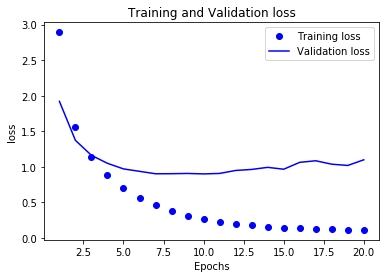

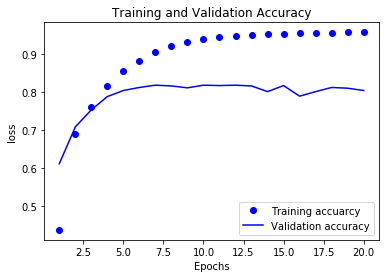

In [51]:
training_loss = dict_history['loss']
val_loss = dict_history['val_loss']
epochs = range(1,len(val_loss)+1)
plt.plot(epochs,training_loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()
plt.clf()
training_acc = dict_history['acc']
val_acc = dict_history['val_acc']
epochs = range(1,len(val_acc)+1)
plt.plot(epochs,training_acc,'bo',label = 'Training accuarcy')
plt.plot(epochs,val_acc,'b',label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [52]:
predictions = model.predict(x_test)

In [53]:
predictions.shape

(2246, 46)

In [57]:
predictions[0].sum()

0.9999999

In [60]:
predictions[0].argmax()

3